In [1]:
# Import necessary libraries and modules
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
df = pd.read_csv('iot23_combined.csv')

In [4]:
df = df.drop(columns=['Unnamed: 0','service','local_orig','local_resp','history'])

In [5]:
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,2.998796,0,0,S0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan
1,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,0.000000,0,0,S0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan
2,1.525880e+09,CMBrup3BLXivSp4Avc,192.168.100.103,50244.0,120.210.108.200,23.0,tcp,0.000000,0,0,S0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan
3,1.525880e+09,CfHl9r3XMYtDQRrHnh,192.168.100.103,34243.0,147.7.65.203,49560.0,tcp,2.998804,0,0,S0,0.0,3.0,180.0,0.0,0.0,Benign
4,1.525880e+09,C7USrA15nFVkniMqC5,192.168.100.103,34840.0,145.164.35.6,21288.0,tcp,0.000000,0,0,S0,0.0,1.0,60.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,1.569018e+09,CMwTZl4N2Q0IKi0Fgk,192.168.1.195,3318.0,162.248.88.215,62336.0,tcp,0.000000,0,0,OTH,0.0,0.0,0.0,0.0,0.0,DDoS
1444670,1.569018e+09,CEE7Bb1YnlZKy47L5j,192.168.1.195,42884.0,162.248.88.215,62336.0,tcp,0.000000,0,0,OTH,0.0,0.0,0.0,0.0,0.0,DDoS
1444671,1.569018e+09,CS9YeA2VI9fEwAogPe,192.168.1.195,61773.0,162.248.88.215,62336.0,tcp,0.000000,0,0,OTH,0.0,0.0,0.0,0.0,0.0,DDoS
1444672,1.569018e+09,Cye6NB3mnllDOP0h4,192.168.1.195,37271.0,162.248.88.215,62336.0,tcp,0.000000,0,0,OTH,0.0,0.0,0.0,0.0,0.0,DDoS


In [6]:
df['label'].unique()

array(['PartOfAHorizontalPortScan', 'Benign', 'C&C', 'Attack',
       'C&C-HeartBeat', 'Okiru', 'DDoS', 'C&C-Torii', 'C&C-FileDownload',
       'FileDownload', 'C&C-HeartBeat-FileDownload', 'C&C-Mirai'],
      dtype=object)

In [7]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state',
       'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'label'],
      dtype='object')

In [8]:
df.iloc[5]

ts                       1525879834.024847
uid                      CDtZ4so7bHKpIeCmi
id.orig_h                  192.168.100.103
id.orig_p                          58525.0
id.resp_h                   177.75.151.125
id.resp_p                             23.0
proto                                  tcp
duration                               0.0
orig_bytes                               0
resp_bytes                               0
conn_state                              S0
missed_bytes                           0.0
orig_pkts                              1.0
orig_ip_bytes                         60.0
resp_pkts                              0.0
resp_ip_bytes                          0.0
label            PartOfAHorizontalPortScan
Name: 5, dtype: object

In [9]:
df['label'].value_counts()

label
PartOfAHorizontalPortScan     825939
Okiru                         262690
Benign                        197809
DDoS                          138777
C&C                            15100
Attack                          3915
C&C-HeartBeat                    349
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: count, dtype: int64

In [10]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state',
       'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'label'],
      dtype='object')

In [11]:
df.columns = [
    'timestamp',
    'unique_identifier',
    'origin_IP',
    'origin_port',
    'destination_IP',
    'destination_port',
    'protocol',
    'duration',
    'orig_bytes',
    'resp_bytes',
    'conn_state',
    'missed_bytes',
    'orig_pkts',
    'orig_ip_bytes',
    'resp_pkts',
    'resp_ip_bytes',
    'label'
]

In [12]:
df

,timestamp,unique_identifier,origin_IP,origin_port,destination_IP,destination_port,protocol,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,2.998796,0,0,S0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan
1,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,0.000000,0,0,S0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan
2,1.525880e+09,CMBrup3BLXivSp4Avc,192.168.100.103,50244.0,120.210.108.200,23.0,tcp,0.000000,0,0,S0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan
3,1.525880e+09,CfHl9r3XMYtDQRrHnh,192.168.100.103,34243.0,147.7.65.203,49560.0,tcp,2.998804,0,0,S0,0.0,3.0,180.0,0.0,0.0,Benign
4,1.525880e+09,C7USrA15nFVkniMqC5,192.168.100.103,34840.0,145.164.35.6,21288.0,tcp,0.000000,0,0,S0,0.0,1.0,60.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,1.569018e+09,CMwTZl4N2Q0IKi0Fgk,192.168.1.195,3318.0,162.248.88.215,62336.0,tcp,0.000000,0,0,OTH,0.0,0.0,0.0,0.0,0.0,DDoS
1444670,1.569018e+09,CEE7Bb1YnlZKy47L5j,192.168.1.195,42884.0,162.248.88.215,62336.0,tcp,0.000000,0,0,OTH,0.0,0.0,0.0,0.0,0.0,DDoS
1444671,1.569018e+09,CS9YeA2VI9fEwAogPe,192.168.1.195,61773.0,162.248.88.215,62336.0,tcp,0.000000,0,0,OTH,0.0,0.0,0.0,0.0,0.0,DDoS
1444672,1.569018e+09,Cye6NB3mnllDOP0h4,192.168.1.195,37271.0,162.248.88.215,62336.0,tcp,0.000000,0,0,OTH,0.0,0.0,0.0,0.0,0.0,DDoS


In [13]:
df['origin_IP'].value_counts()

origin_IP
192.168.1.197      204393
192.168.1.198      199987
192.168.100.111    199935
192.168.1.195      123106
192.168.100.103    100647
                    ...  
167.61.114.113          1
210.155.132.61          1
207.111.171.117         1
138.117.48.2            1
64.187.232.108          1
Name: count, Length: 3266, dtype: int64

In [14]:
df['conn_state'].value_counts()

conn_state
S0        1305208
OTH        117370
SF          16097
REJ          2718
S3           2457
RSTR          551
RSTO          153
S1             48
RSTOS0         30
S2             27
SH              8
RSTRH           5
SHR             2
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='label'>

Text(0.5, 1.0, 'Distribution of Network Events by Label')

Text(0.5, 0, 'Event Label')

Text(0, 0.5, 'Frequency')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'PartOfAHorizontalPortScan'),
  Text(1, 0, 'Okiru'),
  Text(2, 0, 'Benign'),
  Text(3, 0, 'DDoS'),
  Text(4, 0, 'C&C'),
  Text(5, 0, 'Attack'),
  Text(6, 0, 'C&C-HeartBeat'),
  Text(7, 0, 'C&C-FileDownload'),
  Text(8, 0, 'C&C-Torii'),
  Text(9, 0, 'FileDownload'),
  Text(10, 0, 'C&C-HeartBeat-FileDownload'),
  Text(11, 0, 'C&C-Mirai')])

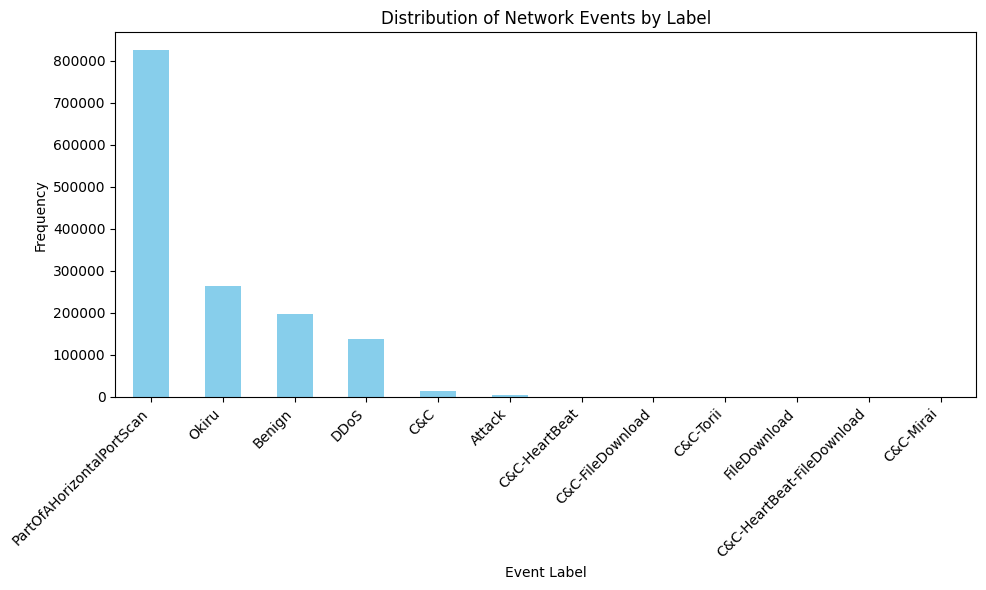

In [15]:
# Ensure your DataFrame is named 'df' and has a column named 'event_label'

# Analysis: Count the number of events for each `event_label`
event_label_counts = df['label'].value_counts()

# Visualization: Bar chart displaying the frequency of each network event type
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
event_label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Network Events by Label')
plt.xlabel('Event Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels to fit them better
plt.tight_layout()  # Adjust the layout to make room for the rotated labels

plt.show()

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7fb036a8bfd0>,
 [Text(0.7482870252505052, -0.806267032590165, 'tcp'),
  Text(-0.7418621588673607, 0.8121825762971396, 'udp'),
  Text(-0.8370086309848771, 0.7137342304085057, 'icmp')],
 [Text(0.40815655922754823, -0.4397820177764536, '96.0%'),
  Text(-0.40465208665492397, 0.44300867798025795, '3.7%'),
  Text(-0.4565501623553875, 0.38930958022282125, '0.3%')])

Text(0.5, 1.0, 'Protocol Usage Frequency')

(-1.0999999483330325,
 1.0999999203628938,
 -1.099999986806239,
 1.0999997249576197)

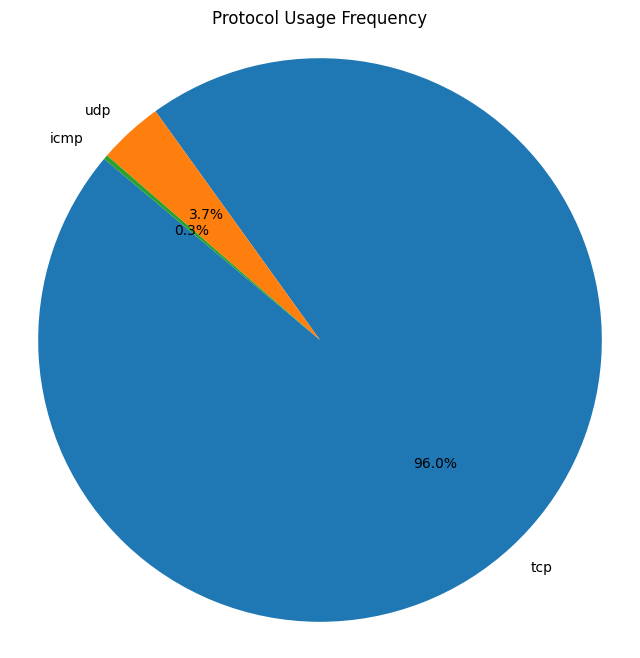

In [16]:
# Analysis: Count the frequency of each network protocol
protocol_usage_counts = df['protocol'].value_counts()

# Visualization: Pie chart showing the proportion of each protocol used
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(protocol_usage_counts, labels=protocol_usage_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Protocol Usage Frequency')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Summary Statistics of Connection Duration by Label:
                               count         mean           std  min  \
label                                                                  
Attack                        3915.0     4.210464      5.671291 -1.0   
Benign                      197809.0     1.244178     67.734269 -1.0   
C&C                          15100.0    10.910159    473.008230 -1.0   
C&C-FileDownload                43.0     1.206104      1.526045 -1.0   
C&C-HeartBeat                  349.0     1.084343      1.388022 -1.0   
C&C-HeartBeat-FileDownload       8.0    -1.000000      0.000000 -1.0   
C&C-Mirai                        1.0    -1.000000           NaN -1.0   
C&C-Torii                       30.0  5719.632747  13417.861921  0.0   
DDoS                        138777.0     0.076525     28.756975 -1.0   
FileDownload                    13.0    -0.709482      0.721001 -1.0   
Okiru                       262690.0    -0.093994      0.396477 -1.0   
PartOfAHoriz

<Figure size 1200x800 with 0 Axes>

<Axes: ylabel='label'>

Text(0.5, 1.0, 'Mean Connection Duration by Label')

Text(0.5, 0, 'Mean Connection Duration (seconds)')

Text(0, 0.5, 'Event Label')

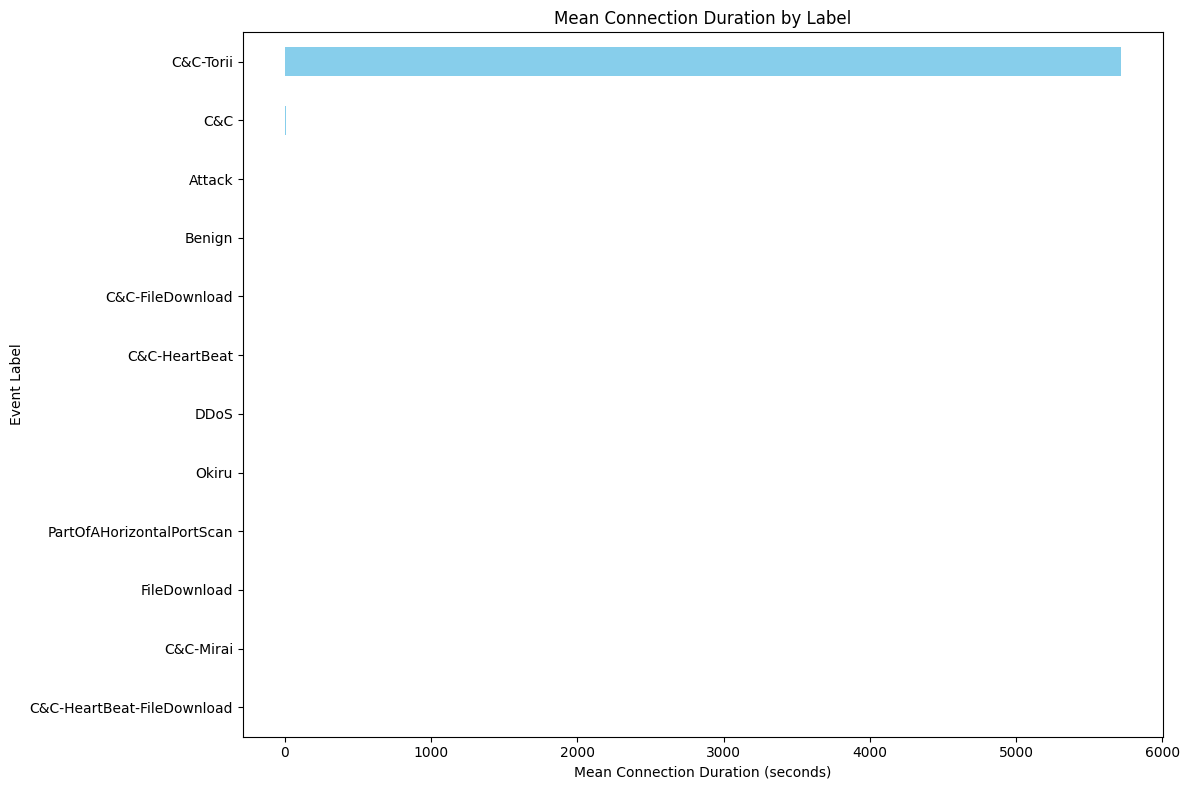

In [17]:
# Assuming your DataFrame is named df and it has columns named 'connection_duration' and 'event_label'
# Ensure 'connection_duration' is numeric
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Group by 'event_label' and calculate summary statistics for 'connection_duration'
connection_duration_by_label = df.groupby('label')['duration'].describe()

# You might be specifically interested in certain statistics, like mean and median:
mean_connection_duration_by_label = df.groupby('label')['duration'].mean()
median_connection_duration_by_label = df.groupby('label')['duration'].median()

# Print the summary statistics
print("Summary Statistics of Connection Duration by Label:")
print(connection_duration_by_label)

# If you want to visualize this, a bar chart for the mean or median connection duration can be insightful:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
mean_connection_duration_by_label.sort_values().plot(kind='barh', color='skyblue')
plt.title('Mean Connection Duration by Label')
plt.xlabel('Mean Connection Duration (seconds)')
plt.ylabel('Event Label')
plt.tight_layout()
plt.show()

# Similar plot can be made for median values or any other statistic of interest.

In [18]:
# Assuming your DataFrame is named df
# Count occurrences of each (source_ip_address, destination_ip_address) pair
pair_counts = df.groupby(['origin_IP', 'destination_IP']).size().reset_index(name='connections')

# Sort pairs by the number of connections, descending
top_pairs = pair_counts.sort_values(by='connections', ascending=False).head(10)

print(top_pairs)

               origin_IP   destination_IP  connections
201088     192.168.1.195   162.248.88.215        99403
1085635      192.168.2.5   200.168.87.203        14662
201083     192.168.1.195   123.59.209.185        14260
201094     192.168.1.195   185.244.25.235         6768
1056836  192.168.100.113  178.128.185.250         4112
1056831  192.168.100.113   128.185.250.50         4110
328571     192.168.1.197   185.244.25.183         1947
1056839  192.168.100.113    192.168.100.1         1872
333721     192.168.1.197      192.168.1.1         1681
1056834  192.168.100.113    147.231.100.5         1334


<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Top Communicating IP Pairs')

(-1.199189575591831,
 1.2089727651014863,
 -0.9997466929519943,
 0.851425371870588)

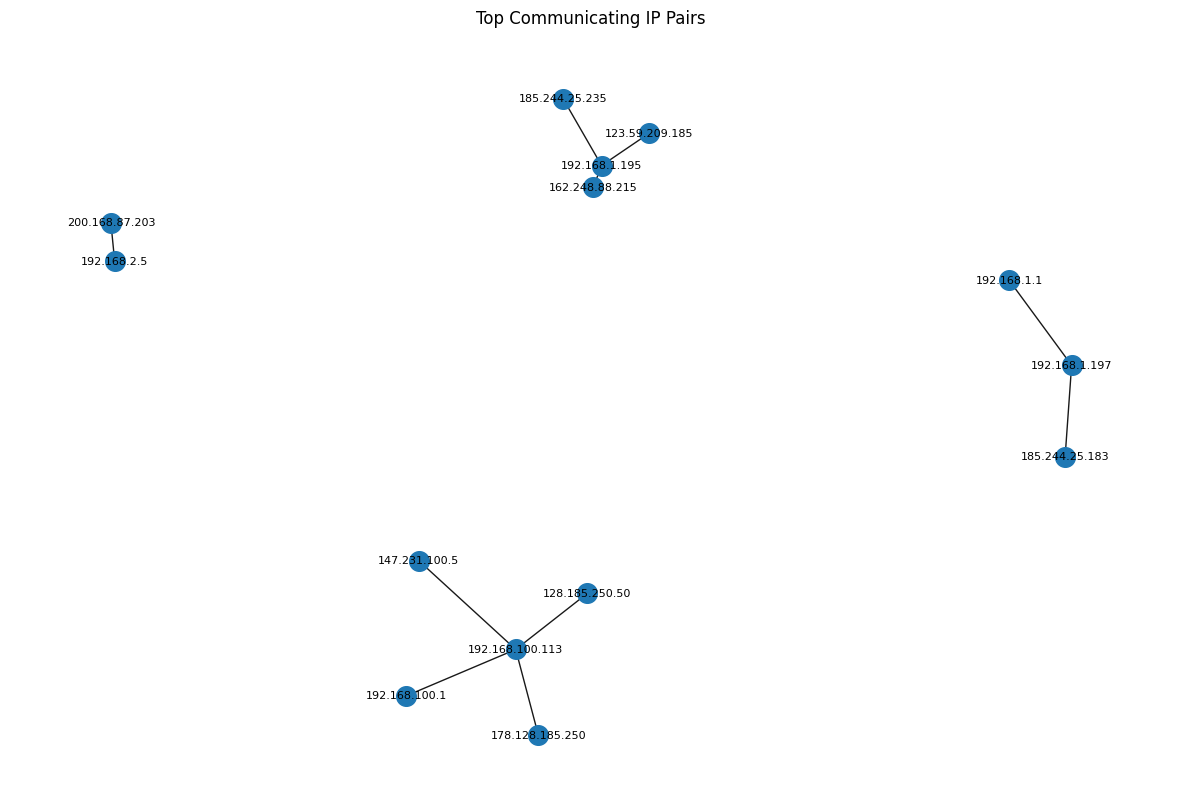

In [19]:
# Create a graph
G = nx.Graph()

# Add edges from top_pairs
# Assuming 'top_pairs' contains the top communicating IP pairs
for index, row in top_pairs.iterrows():
    G.add_edge(row['origin_IP'], row['destination_IP'], weight=row['connections'])

# Draw the network
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=5, seed=42)  # For consistent layout
edges = nx.draw_networkx_edges(G, pos, alpha=0.9)
nodes = nx.draw_networkx_nodes(G, pos, node_size=200)
labels = nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Top Communicating IP Pairs')
plt.axis('off')  # Turn off the axis
plt.show()

In [20]:
# Assuming G is your graph
for (source, destination, data) in G.edges(data=True):
    print(f"Source: {source}, Destination: {destination}, Connections: {data.get('weight', 'N/A')}")

Source: 192.168.1.195, Destination: 162.248.88.215, Connections: 99403
Source: 192.168.1.195, Destination: 123.59.209.185, Connections: 14260
Source: 192.168.1.195, Destination: 185.244.25.235, Connections: 6768
Source: 192.168.2.5, Destination: 200.168.87.203, Connections: 14662
Source: 192.168.100.113, Destination: 178.128.185.250, Connections: 4112
Source: 192.168.100.113, Destination: 128.185.250.50, Connections: 4110
Source: 192.168.100.113, Destination: 192.168.100.1, Connections: 1872
Source: 192.168.100.113, Destination: 147.231.100.5, Connections: 1334
Source: 192.168.1.197, Destination: 185.244.25.183, Connections: 1947
Source: 192.168.1.197, Destination: 192.168.1.1, Connections: 1681


<Figure size 1200x600 with 0 Axes>

(array([1.444656e+06, 2.000000e+00, 3.000000e+00, 2.000000e+00,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 1.000000e+00,
        3.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([       0.        ,  1320547.08      ,  2641094.16      ,
         3961641.24      ,  5282188.32      ,  6602735.4       ,
         7923282.48      ,  9243829.56      , 10564376.64      ,

(array([1.444645e+06, 1.900000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([   0.  ,  186.14,  372.28,  558.42,  744.56,  930.7 , 1116.84,
        1302.98, 1489.12, 1675.26, 1861.4 , 2047.54, 2233.68, 2419.82,
        2605.96, 2792.1 , 2978.24, 3164.38, 3350.52,

Text(0.5, 0, 'Number of Packets')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Packets Sent by Source and Destination')

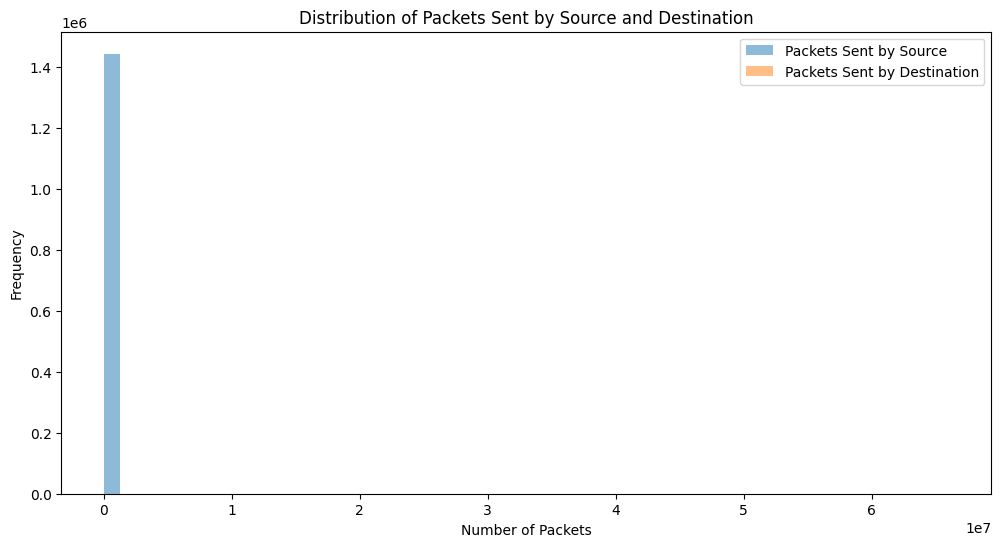

In [21]:
df['orig_pkts'] = pd.to_numeric(df['orig_pkts'], errors='coerce')
df['resp_pkts'] = pd.to_numeric(df['resp_pkts'], errors='coerce')

plt.figure(figsize=(12, 6))

# Plot histograms for packets sent by source and destination
plt.hist(df['orig_pkts'], bins=50, alpha=0.5, label='Packets Sent by Source')
plt.hist(df['resp_pkts'], bins=50, alpha=0.5, label='Packets Sent by Destination')

plt.xlabel('Number of Packets')
plt.ylabel('Frequency')
plt.title('Distribution of Packets Sent by Source and Destination')
plt.legend()

plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Type', ylabel='Packets'>

Text(0.5, 1.0, 'Box Plot of Packets Sent by Source and Destination')

Text(0.5, 0, '')

Text(0, 0.5, 'Number of Packets')

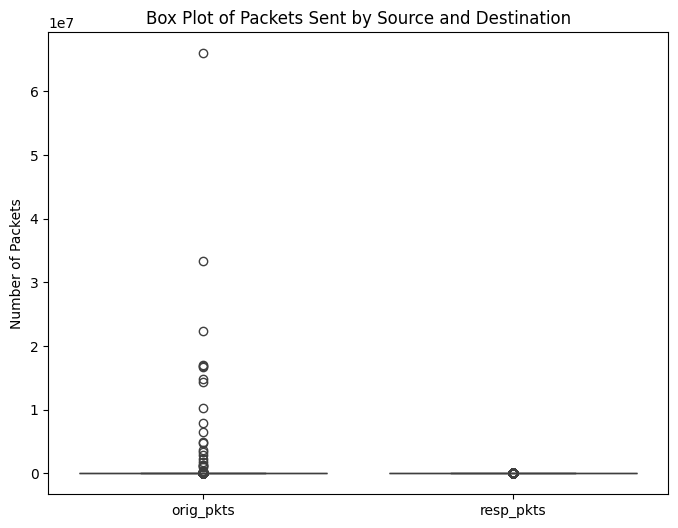

In [22]:
plt.figure(figsize=(8, 6))

# Melting the DataFrame for easier plotting with seaborn
packets_melted = df.melt(value_vars=['orig_pkts', 'resp_pkts'], var_name='Type', value_name='Packets')

# Plotting with seaborn
sns.boxplot(x='Type', y='Packets', data=packets_melted)
plt.title('Box Plot of Packets Sent by Source and Destination')
plt.xlabel('')
plt.ylabel('Number of Packets')

plt.show()

In [23]:
connection_states_freq = df['conn_state'].value_counts()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='conn_state'>

Text(0.5, 0, 'Connection State')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Frequency of Network Events by Connection State')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'S0'),
  Text(1, 0, 'OTH'),
  Text(2, 0, 'SF'),
  Text(3, 0, 'REJ'),
  Text(4, 0, 'S3'),
  Text(5, 0, 'RSTR'),
  Text(6, 0, 'RSTO'),
  Text(7, 0, 'S1'),
  Text(8, 0, 'RSTOS0'),
  Text(9, 0, 'S2'),
  Text(10, 0, 'SH'),
  Text(11, 0, 'RSTRH'),
  Text(12, 0, 'SHR')])

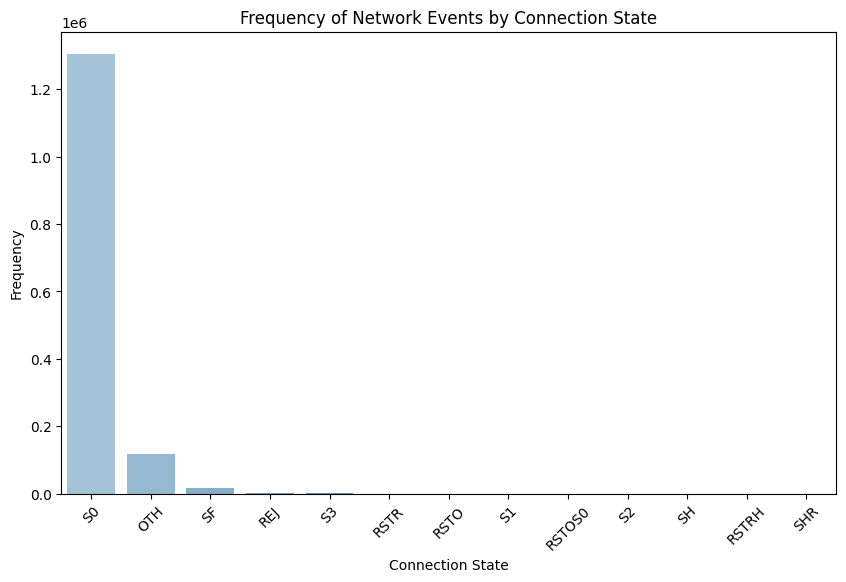

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=connection_states_freq.index, y=connection_states_freq.values, hue=connection_states_freq.index, palette='Blues_d', legend=False)

plt.xlabel('Connection State')
plt.ylabel('Frequency')
plt.title('Frequency of Network Events by Connection State')
plt.xticks(rotation=45)  # Rotate labels for readability

plt.show()

In [25]:
connection_states_freq

conn_state
S0        1305208
OTH        117370
SF          16097
REJ          2718
S3           2457
RSTR          551
RSTO          153
S1             48
RSTOS0         30
S2             27
SH              8
RSTRH           5
SHR             2
Name: count, dtype: int64